In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"E:\MTECH\Smart Grid\SuperGrid\ukpn-super-grid-transformer.csv")

In [3]:
df.head()

,Date,GSP,SGT,Voltage_Min,Voltage_Max,Voltage_Avg,ActivePower_Min,ActivePower_Max,ActivePower_Avg,ReActivePower_Min,ReActivePower_Max,ReActivePower_Avg,Current_Min,Current_Max,Current_Avg
0,2024-04-24T03:30:00+00:00,BARKING WEST (LPN),SGT3A,33.24,33.24,33.24,21.84,22.22,22.15,-7.79,-7.31,-7.41,406.28,408.01,407.88
1,2024-04-24T03:00:00+00:00,BARKING WEST (LPN),SGT3A,33.21,33.24,33.24,21.87,22.25,22.17,-7.79,-7.31,-7.53,408.01,411.07,408.81
2,2024-04-24T02:00:00+00:00,BARKING WEST (LPN),SGT3A,33.40,33.74,33.64,23.01,23.36,23.31,-7.31,-4.84,-7.05,416.93,425.87,420.67
3,2024-04-24T21:30:00+00:00,BARKING WEST (LPN),SGT4A,33.22,33.35,33.29,19.71,20.70,20.21,2.48,2.94,2.87,347.42,349.39,349.28
4,2024-04-24T21:00:00+00:00,BARKING WEST (LPN),SGT4A,33.13,33.31,33.22,19.37,20.70,20.00,2.94,2.96,2.94,337.66,372.84,349.24


In [4]:
var = "BARKING WEST (LPN)"
dfx = df[df.GSP == var]
del df
dfx.head()

,Date,GSP,SGT,Voltage_Min,Voltage_Max,Voltage_Avg,ActivePower_Min,ActivePower_Max,ActivePower_Avg,ReActivePower_Min,ReActivePower_Max,ReActivePower_Avg,Current_Min,Current_Max,Current_Avg
0,2024-04-24T03:30:00+00:00,BARKING WEST (LPN),SGT3A,33.24,33.24,33.24,21.84,22.22,22.15,-7.79,-7.31,-7.41,406.28,408.01,407.88
1,2024-04-24T03:00:00+00:00,BARKING WEST (LPN),SGT3A,33.21,33.24,33.24,21.87,22.25,22.17,-7.79,-7.31,-7.53,408.01,411.07,408.81
2,2024-04-24T02:00:00+00:00,BARKING WEST (LPN),SGT3A,33.40,33.74,33.64,23.01,23.36,23.31,-7.31,-4.84,-7.05,416.93,425.87,420.67
3,2024-04-24T21:30:00+00:00,BARKING WEST (LPN),SGT4A,33.22,33.35,33.29,19.71,20.70,20.21,2.48,2.94,2.87,347.42,349.39,349.28
4,2024-04-24T21:00:00+00:00,BARKING WEST (LPN),SGT4A,33.13,33.31,33.22,19.37,20.70,20.00,2.94,2.96,2.94,337.66,372.84,349.24


In [5]:
dfx['Date'] = pd.to_datetime(dfx.Date)

# since gsp would be same for Barking West 
dfx.drop('GSP', axis = 1, inplace = True)

# sort by time date
df = dfx.sort_values(by = ['SGT', 'Date'])

In [6]:
df.head()

,Date,SGT,Voltage_Min,Voltage_Max,Voltage_Avg,ActivePower_Min,ActivePower_Max,ActivePower_Avg,ReActivePower_Min,ReActivePower_Max,ReActivePower_Avg,Current_Min,Current_Max,Current_Avg
4718696,2021-01-01 00:30:00+00:00,AGGREGATE,33.01,33.02,33.01,133.57,136.70,135.02,-7.70,-7.41,-7.61,2334.03,2381.00,2362.06
4312512,2021-01-01 01:00:00+00:00,AGGREGATE,33.02,33.03,33.02,130.02,133.68,132.04,-7.70,-7.70,-7.70,2287.75,2337.35,2311.95
2082716,2021-01-01 01:30:00+00:00,AGGREGATE,33.03,33.07,33.03,125.96,130.72,128.38,-8.20,-6.50,-7.65,2196.40,2287.75,2248.77
4718693,2021-01-01 02:00:00+00:00,AGGREGATE,33.07,33.22,33.14,119.66,125.96,122.83,-8.69,-7.26,-8.17,2090.99,2196.40,2142.51
4718690,2021-01-01 02:30:00+00:00,AGGREGATE,33.10,33.38,33.29,113.17,119.66,116.80,-12.30,-6.49,-9.04,1979.43,2090.99,2034.02


In [7]:
df.set_index('Date', inplace = True)

In [8]:
df.head()

,SGT,Voltage_Min,Voltage_Max,Voltage_Avg,ActivePower_Min,ActivePower_Max,ActivePower_Avg,ReActivePower_Min,ReActivePower_Max,ReActivePower_Avg,Current_Min,Current_Max,Current_Avg
Date,,,,,,,,,,,,,
2021-01-01 00:30:00+00:00,AGGREGATE,33.01,33.02,33.01,133.57,136.70,135.02,-7.70,-7.41,-7.61,2334.03,2381.00,2362.06
2021-01-01 01:00:00+00:00,AGGREGATE,33.02,33.03,33.02,130.02,133.68,132.04,-7.70,-7.70,-7.70,2287.75,2337.35,2311.95
2021-01-01 01:30:00+00:00,AGGREGATE,33.03,33.07,33.03,125.96,130.72,128.38,-8.20,-6.50,-7.65,2196.40,2287.75,2248.77
2021-01-01 02:00:00+00:00,AGGREGATE,33.07,33.22,33.14,119.66,125.96,122.83,-8.69,-7.26,-8.17,2090.99,2196.40,2142.51
2021-01-01 02:30:00+00:00,AGGREGATE,33.10,33.38,33.29,113.17,119.66,116.80,-12.30,-6.49,-9.04,1979.43,2090.99,2034.02


In [9]:
"""from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt"""

In [10]:
"""p, d, q = 1, 1, 1  # Non-seasonal orders
P, D, Q, s = 1, 1, 1, 12  # Seasonal orders (e.g., monthly seasonality)"""

In [11]:
#y = df.ActivePower_Avg

In [12]:
"""model = SARIMAX(y, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()"""

'model = SARIMAX(y, order=(p, d, q), seasonal_order=(P, D, Q, s))\nresults = model.fit()'

In [92]:
#### plot class
class sg_plots:
    def __init__(self, df):
        self.df = df
        
    def overall(self, quantity):
        sns.lineplot(x = self.df.index , y = self.df[quantity], hue = df['SGT'])
        plt.title(f"Overall consumption of {quantity}")
        plt.show()
        
    def yearly(self, quantity):
        plt.figure(figsize = (20, 20))
        plt.suptitle("Yearwise consumption pattern", fontsize = 23)

        for x in range(2021, 2025):
            plt.subplot(2,2,x - 2020)
            dfy = self.df[self.df.index.year == x]
            sns.lineplot(x = dfy.index , y = dfy[quantity], hue = dfy['SGT'])
            plt.title(f"{x} consumption")
        plt.show()
        
    def monthly(self, yr, quantity):
        dfy = self.df[self.df.index.year == yr]
        plt.figure(figsize = (20, 20))
        for x in range(1, 13):
            dfm = dfy[dfy.index.month == x]
            plt.subplot(4, 3, x)
            sns.lineplot(x = dfm.index , y = dfm[quantity], hue = dfm['SGT'], legend = False)
            plt.title(f"Monthly consumption of month {x}th of {yr}")

        plt.suptitle(f"Monthly consumption quantity {quantity}", fontsize = 23)
        plt.show()
        
    def daily(self, yr, mth, quantity):
        dfy = self.df[self.df.index.year == yr]
        dfm = dfy[dfy.index.month == mth]
        plt.figure(figsize = (20, 20))
        plt.suptitle(f"Daily Consumption of {mth}th month {yr} of {quantity} ", fontsize = 23)
        for x in range(1, 32):
            plt.subplot(4,8,x)
            dfmd = dfm[dfm.index.day == x]
            sns.lineplot(x = dfmd.index.hour , y = dfmd[quantity], hue = dfmd['SGT'], legend = False)

        plt.show()

## Consumption Analysis

### Overall consumption

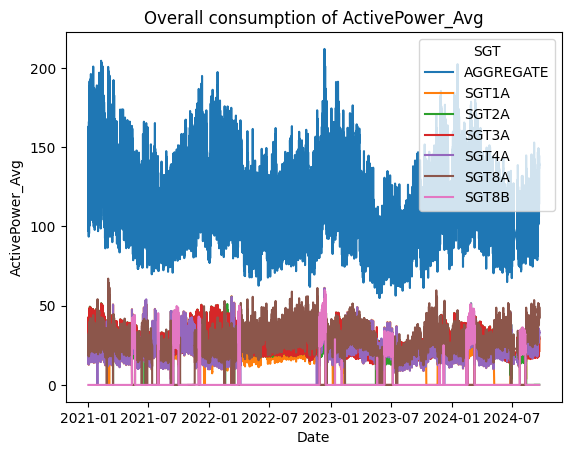

In [81]:
sg_plots(df).overall('ActivePower_Avg')

### Yearly consumption

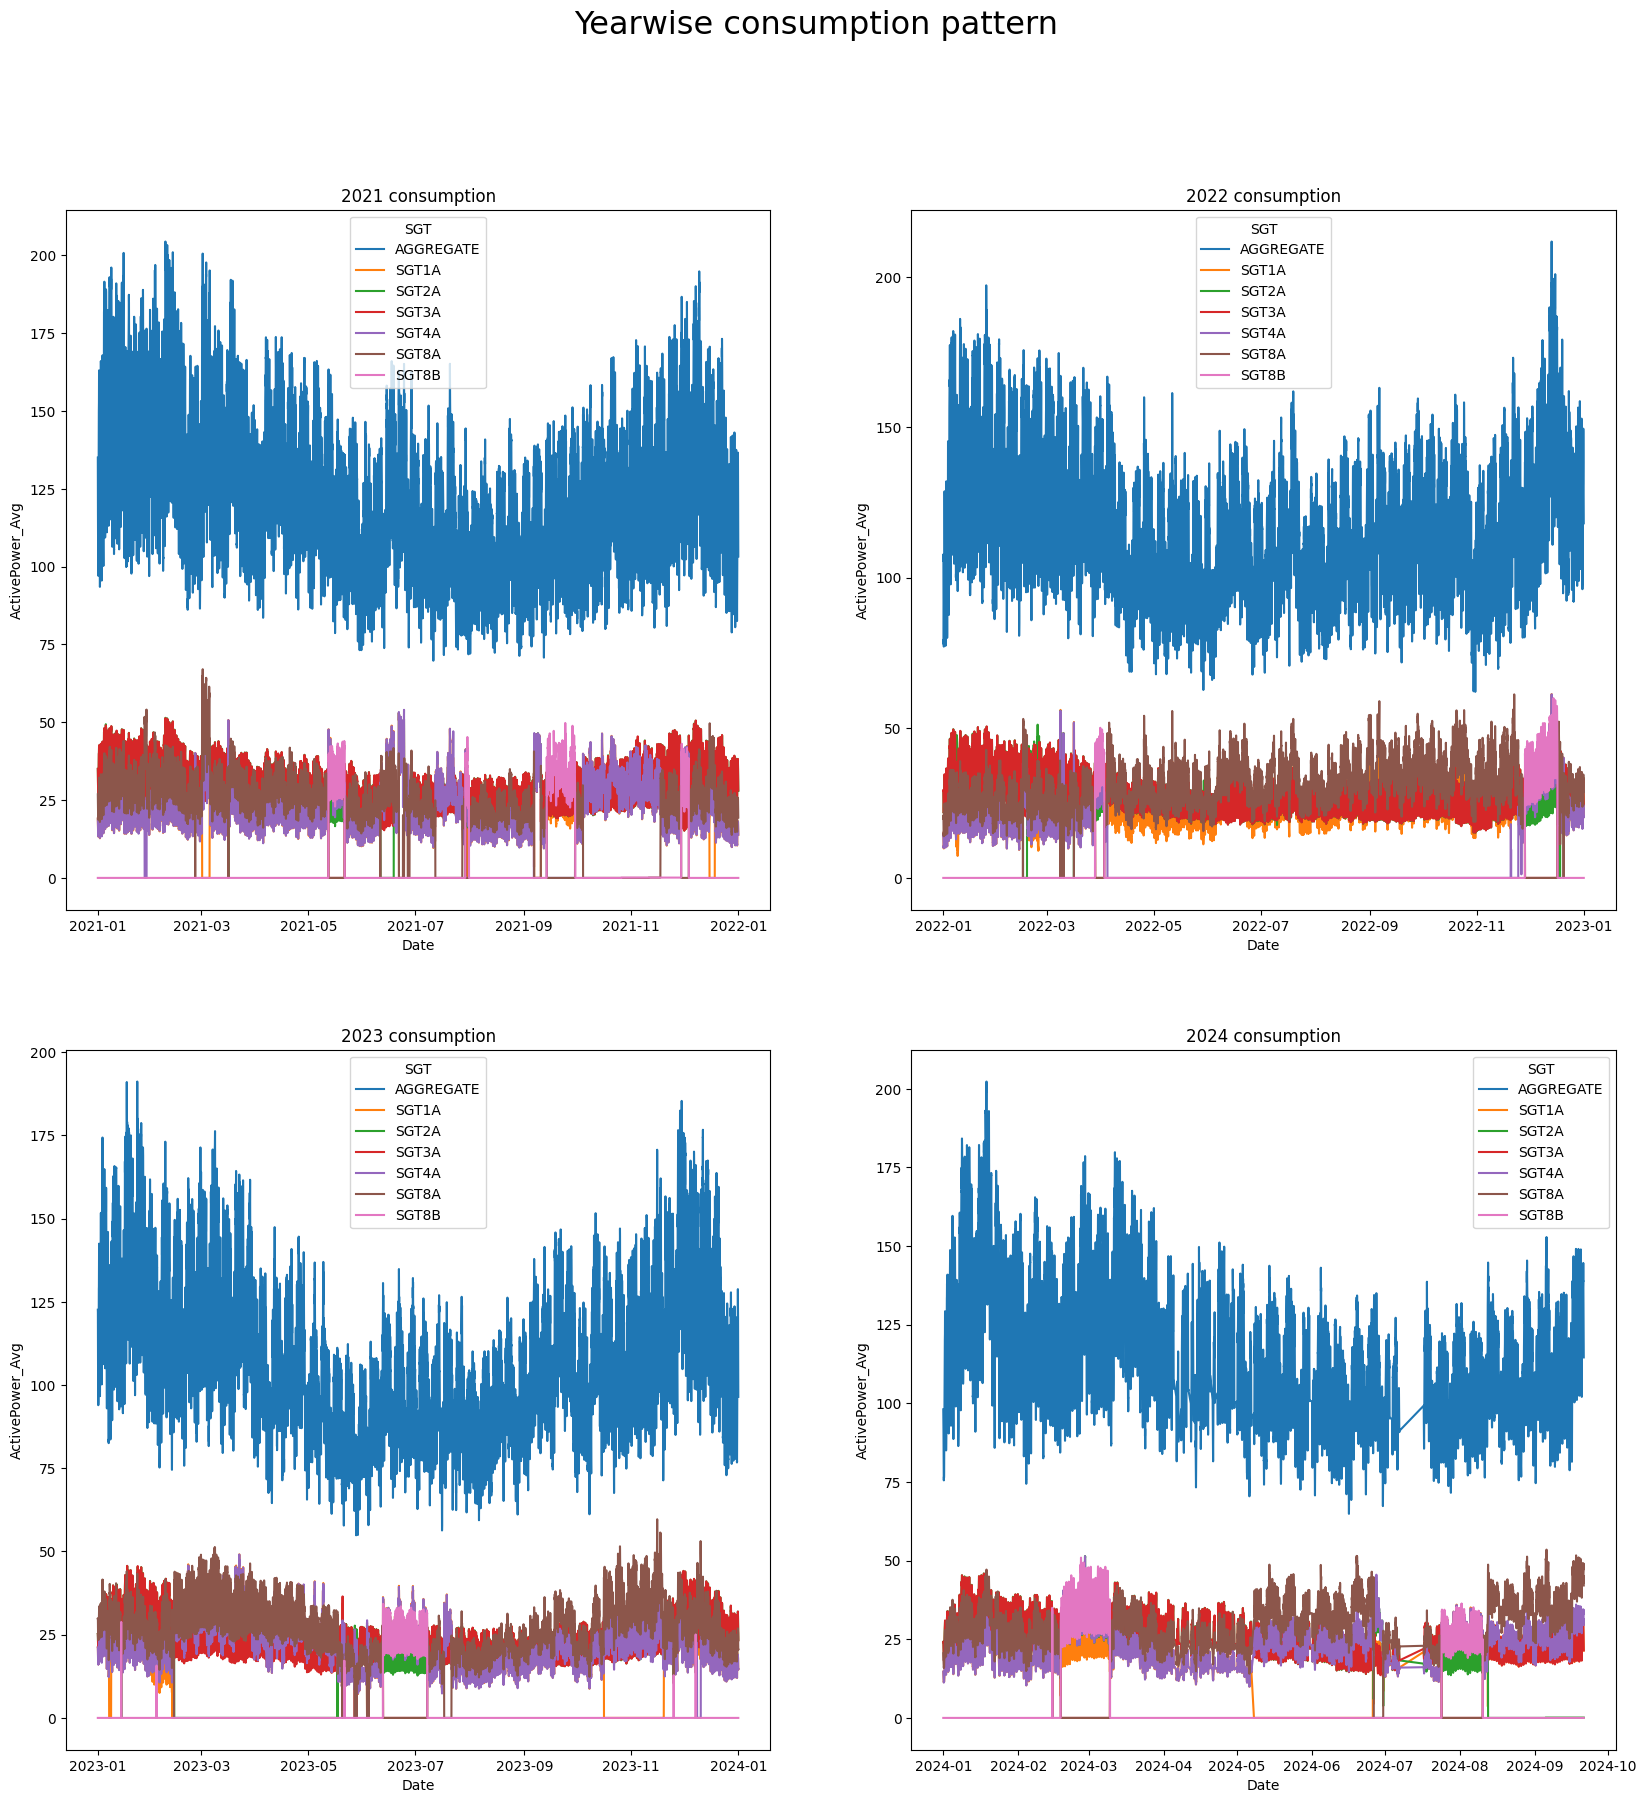

In [83]:
sg_plots(df).yearly('ActivePower_Avg')

### Monthly consumption

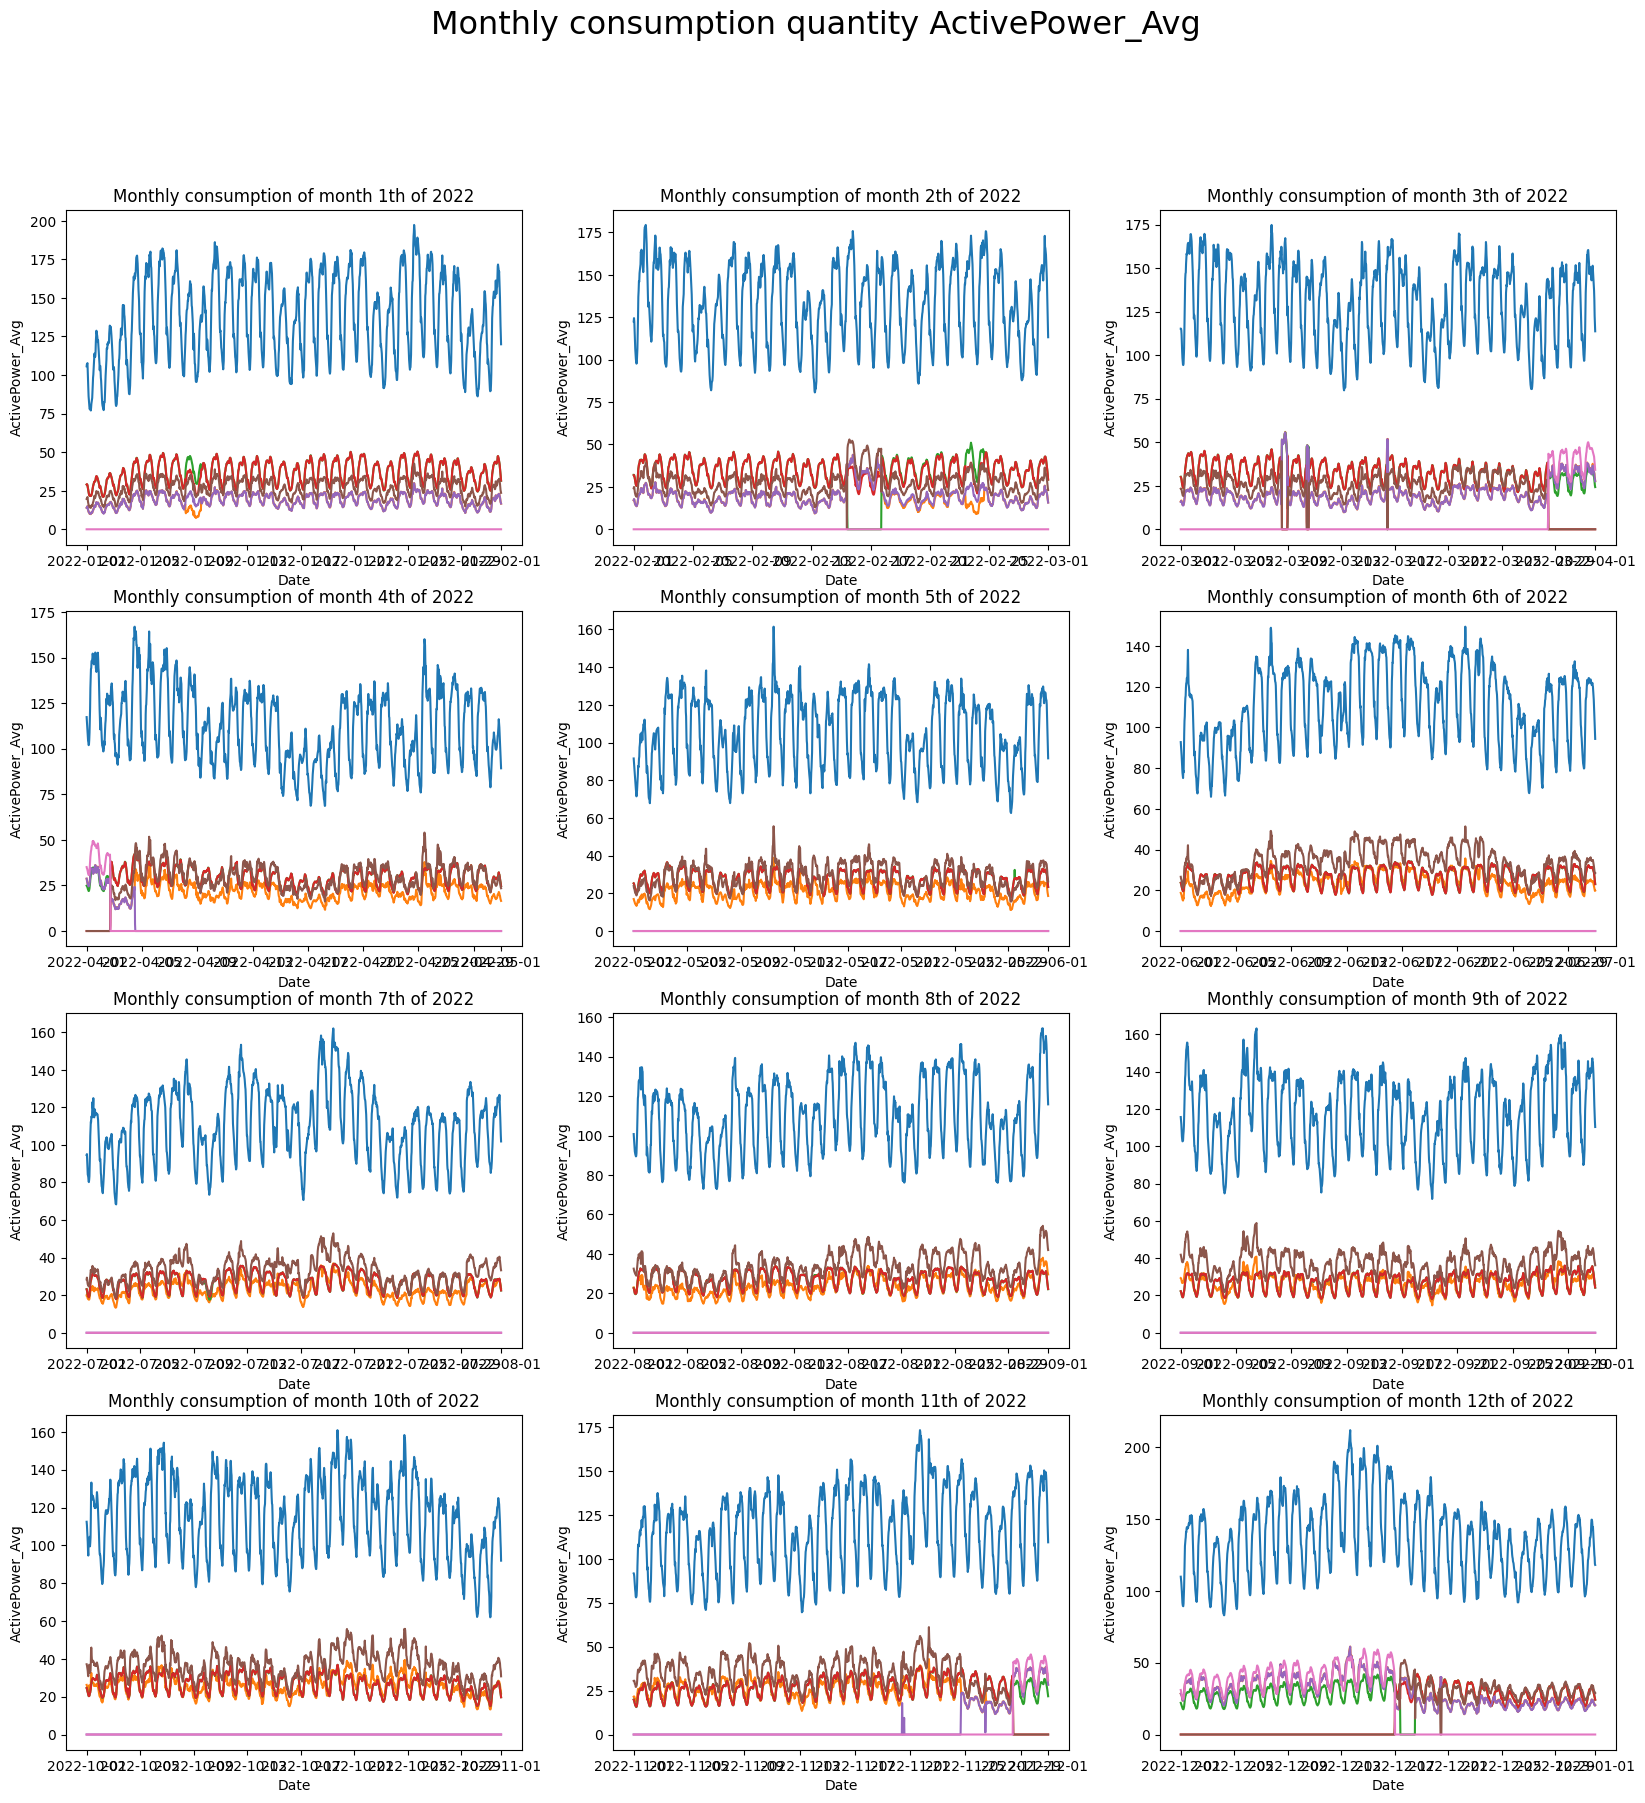

In [90]:
sg_plots(df).monthly(2022, 'ActivePower_Avg')

### Daily Consumption

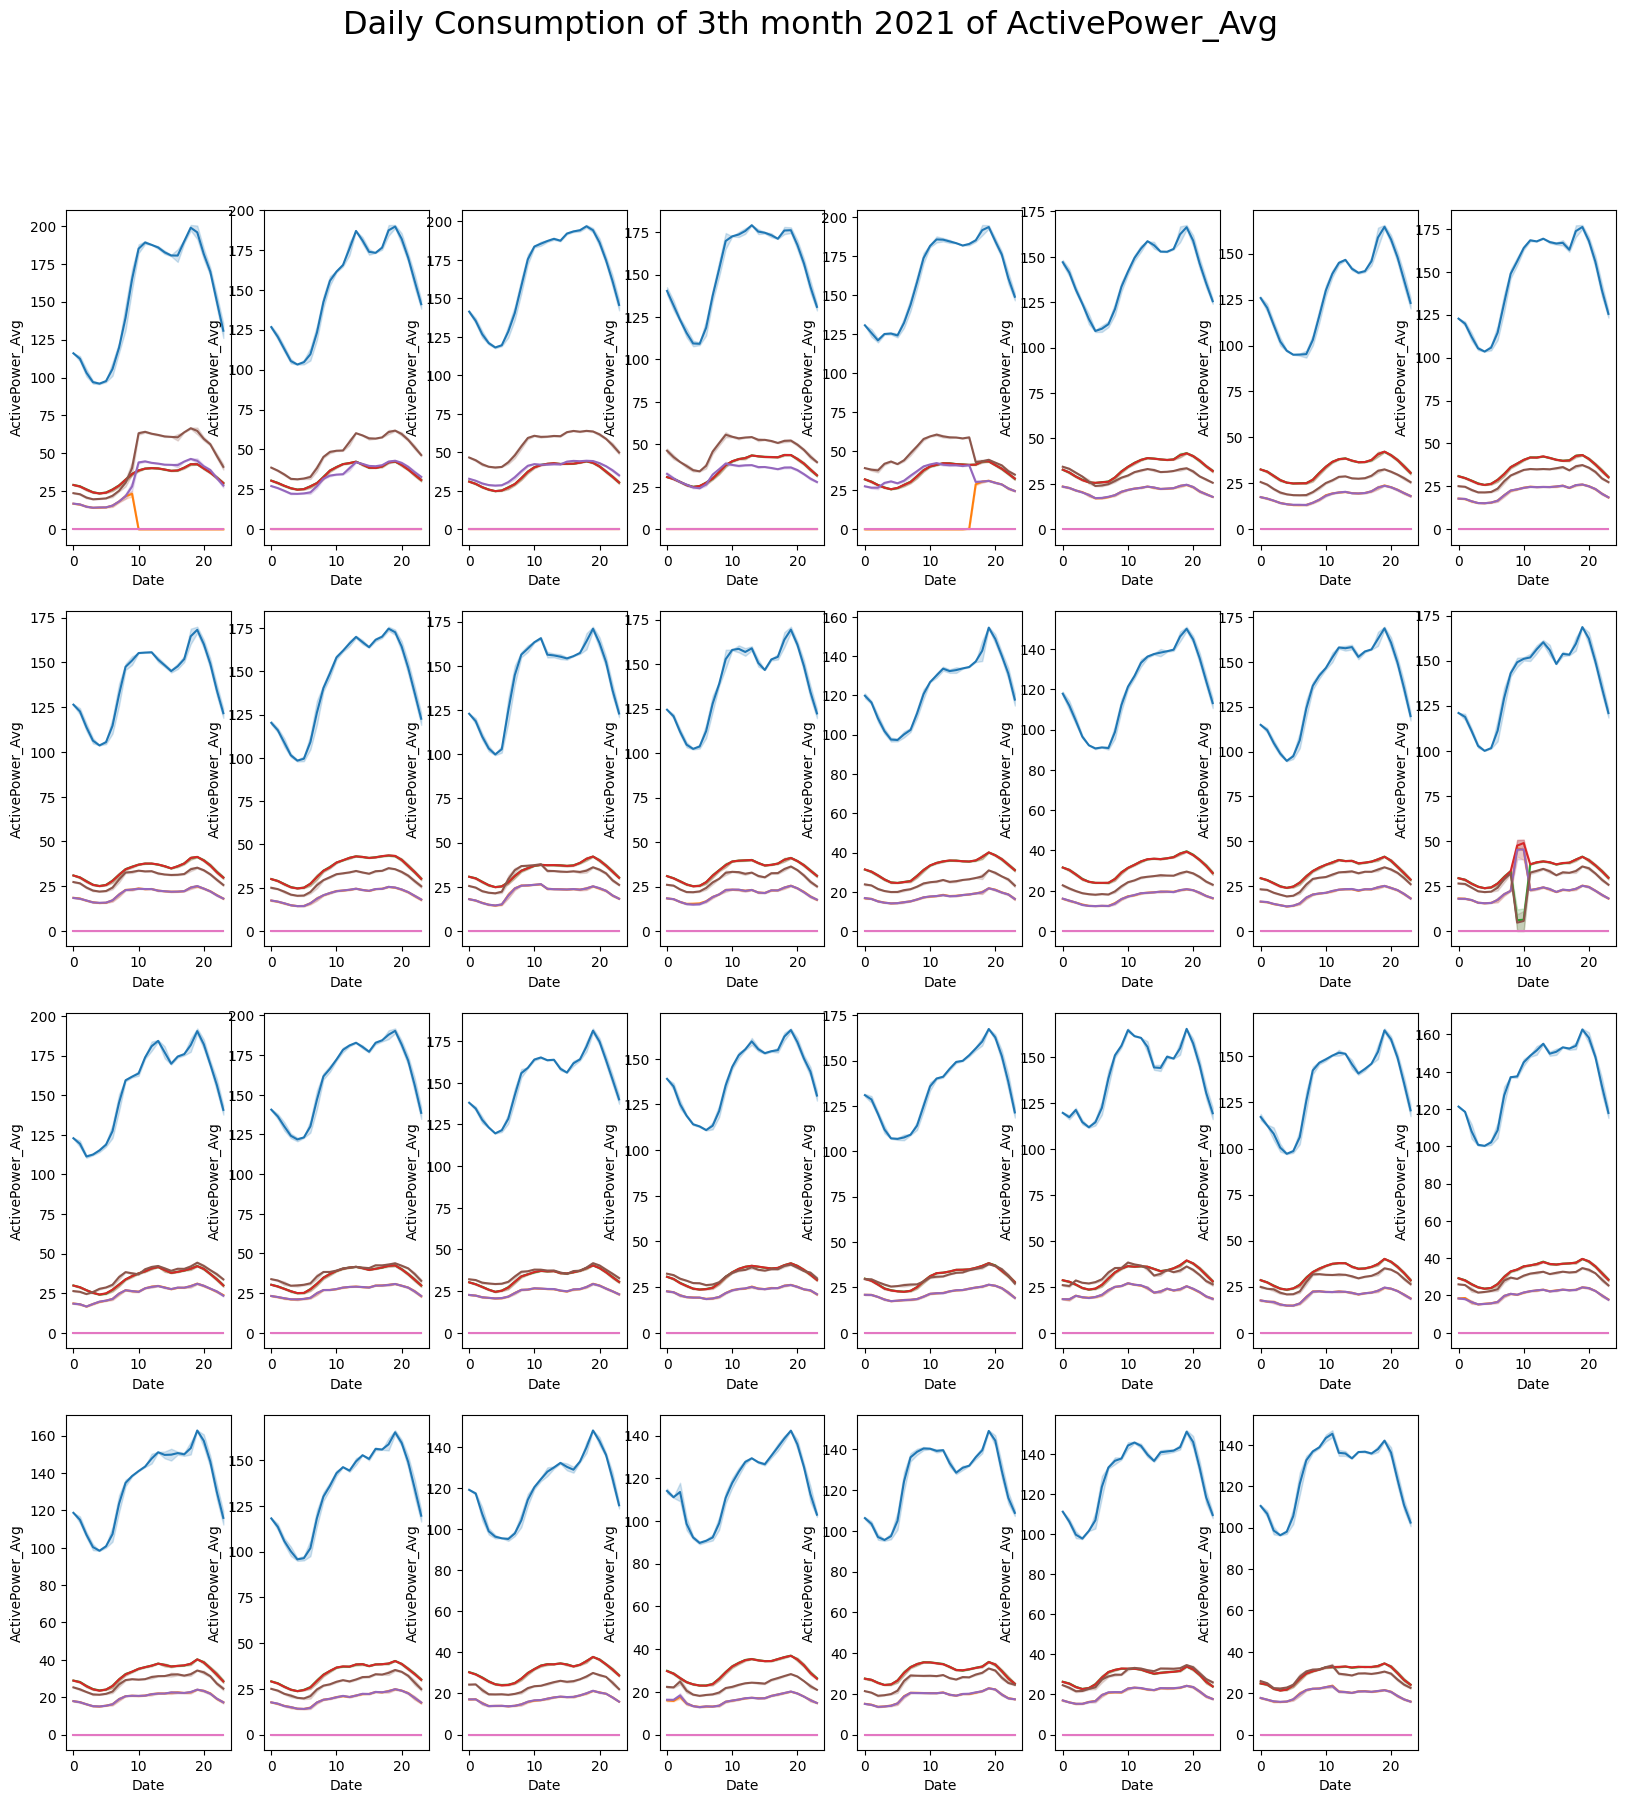

In [93]:
sg_plots(df).daily(2021, 3,'ActivePower_Avg')

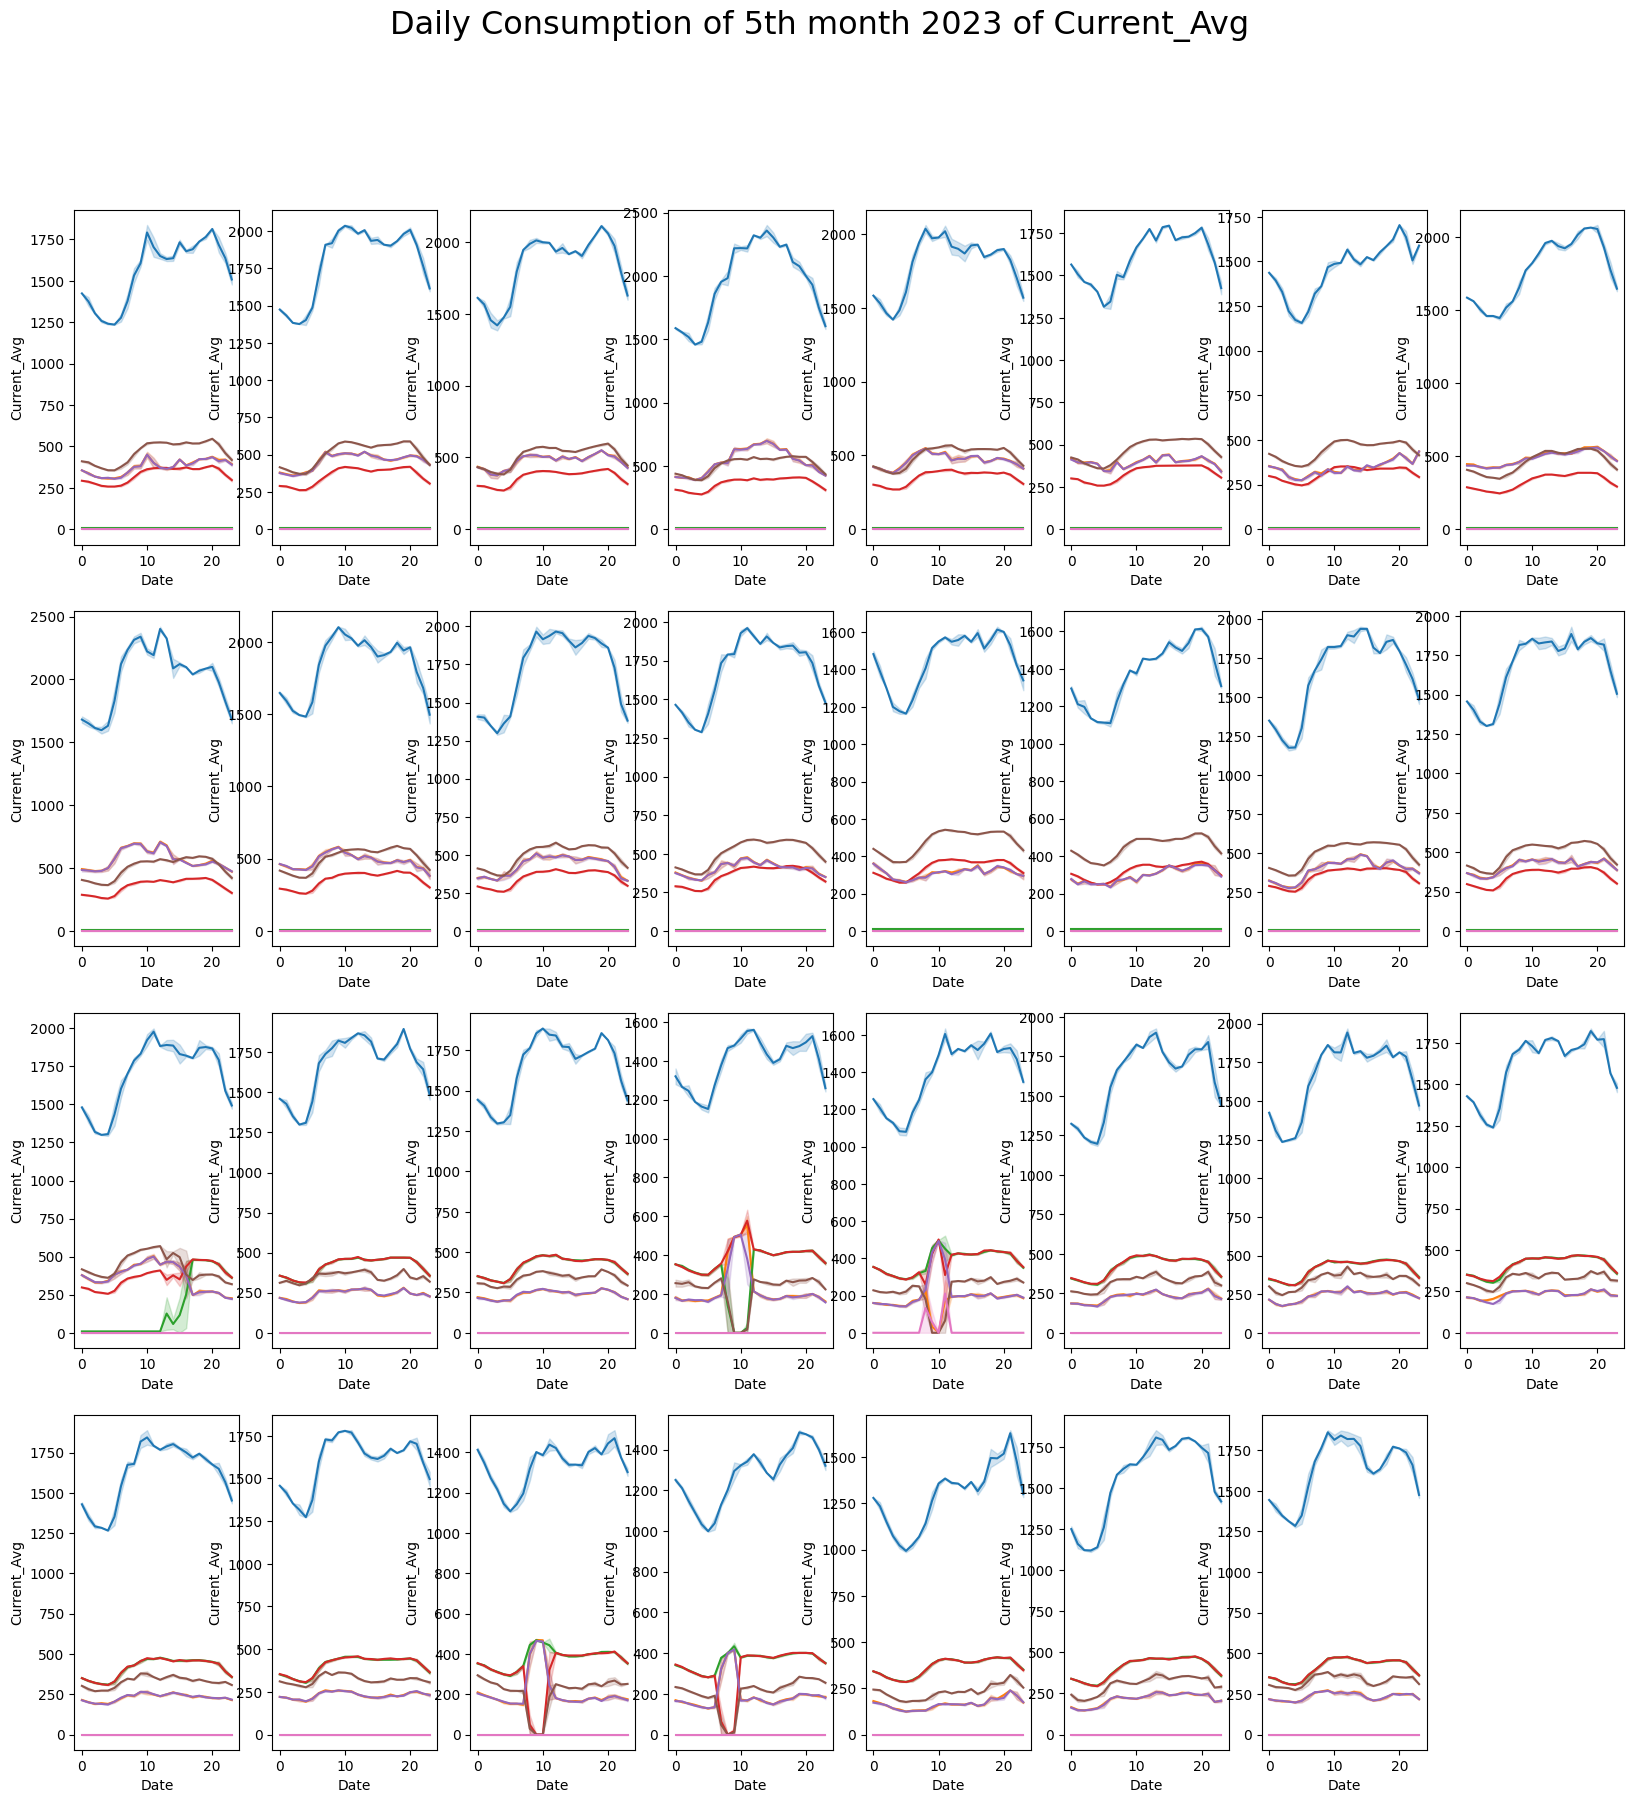

In [95]:
sg_plots(df).daily(2023, 5,'Current_Avg')

### kde plot

<Axes: xlabel='ActivePower_Avg', ylabel='Density'>

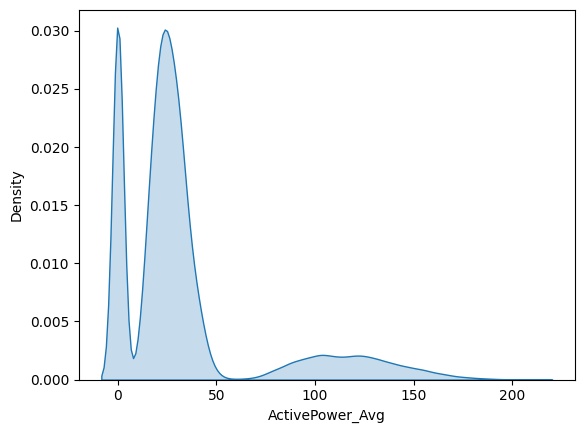

In [50]:
sns.kdeplot(df.ActivePower_Avg, fill = True)

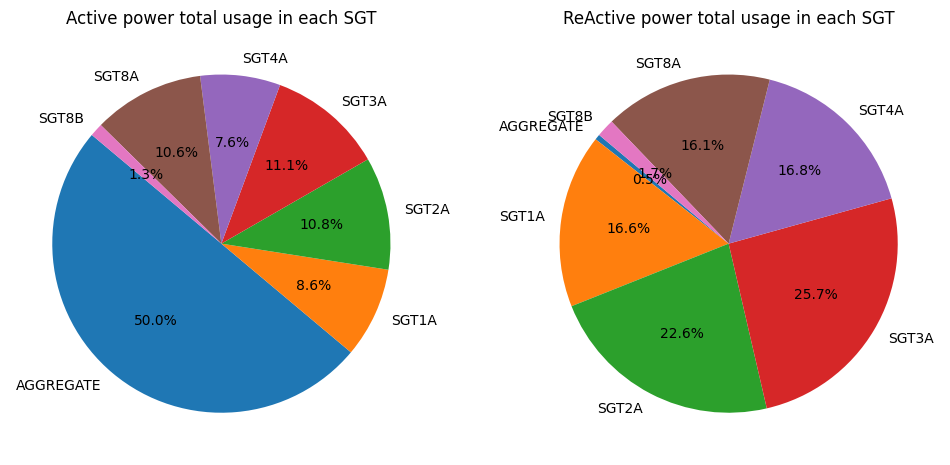

In [70]:
aggt1 = df.groupby('SGT').ActivePower_Avg.sum()
aggt2 = df.groupby('SGT').ReActivePower_Avg.sum().reset_index(name = 'summ')
aggt2['summ'] = aggt2.summ.apply(lambda x : abs(x))
aggt2.columns = ['index', 'summ']

plt.figure(figsize = (12, 8) )
plt.subplot(1, 2, 1)
plt.pie(aggt1, labels=aggt1.index, autopct='%1.1f%%', startangle=140)
plt.title("Active power total usage in each SGT")

plt.subplot(1, 2, 2)
plt.pie(aggt2['summ'], labels=aggt2['index'], autopct='%1.1f%%', startangle=140)
plt.title("ReActive power total usage in each SGT")
plt.show()

<Axes: xlabel='index', ylabel='summ'>

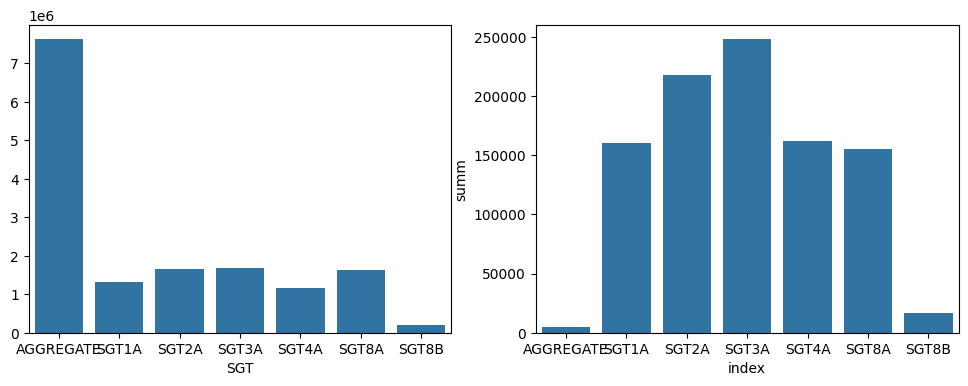

In [71]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x = aggt1.index, y = aggt1.values)

plt.subplot(1, 2, 2)
sns.barplot(x = aggt2['index'], y = aggt2['summ'])

### Box plot

<Axes: ylabel='ActivePower_Avg'>

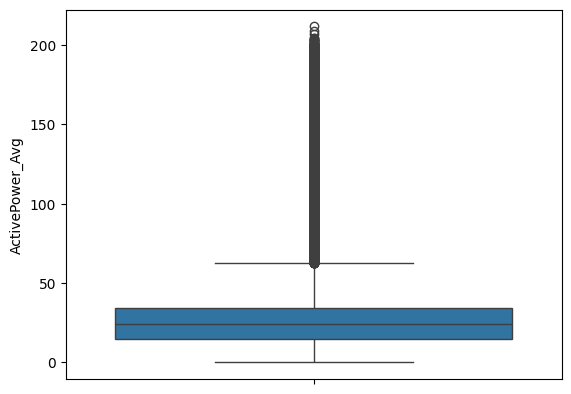

In [72]:
sns.boxplot(df.ActivePower_Avg)